# Machine learning project on sklearn-wine dataset
### by Lorenzo Bussotti

The aim of this little project was to develop a procedure for a first rough data analysis, which lately lead to the definition of multiple machine learning models.
This dataset was made using 13 physicochemical characteristics of wine from 3 different variety of grapes grown in the same region of Italy.

### Dataset:                                                                                              
-alcohol	
-malic acid	
-ash	
-alcalinity of ash	
-magnesium	
-total phenols	
-flavanoids	
-nonflavanoid phenols	
-proanthocyanins	
-color intensity	
-hue	
-od280/od315 of diluted_wines (optical density 280 and 315 nm)	
-proline <br>
-class --> target feature

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns

In [36]:
#load sklearn dataset as pandas dataframe
X, y = load_wine(return_X_y= True, as_frame=True)
#change integers with three Tuscany grape's names to make it cooler
X['class'] = y.replace({0:'sangiovese', 1:'ciliegiolo', 2:'montepulciano'}) 
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,sangiovese
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,sangiovese
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,sangiovese
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,sangiovese
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,sangiovese


Let's analyse if the feature's examples make the classe's distribution distinguishable

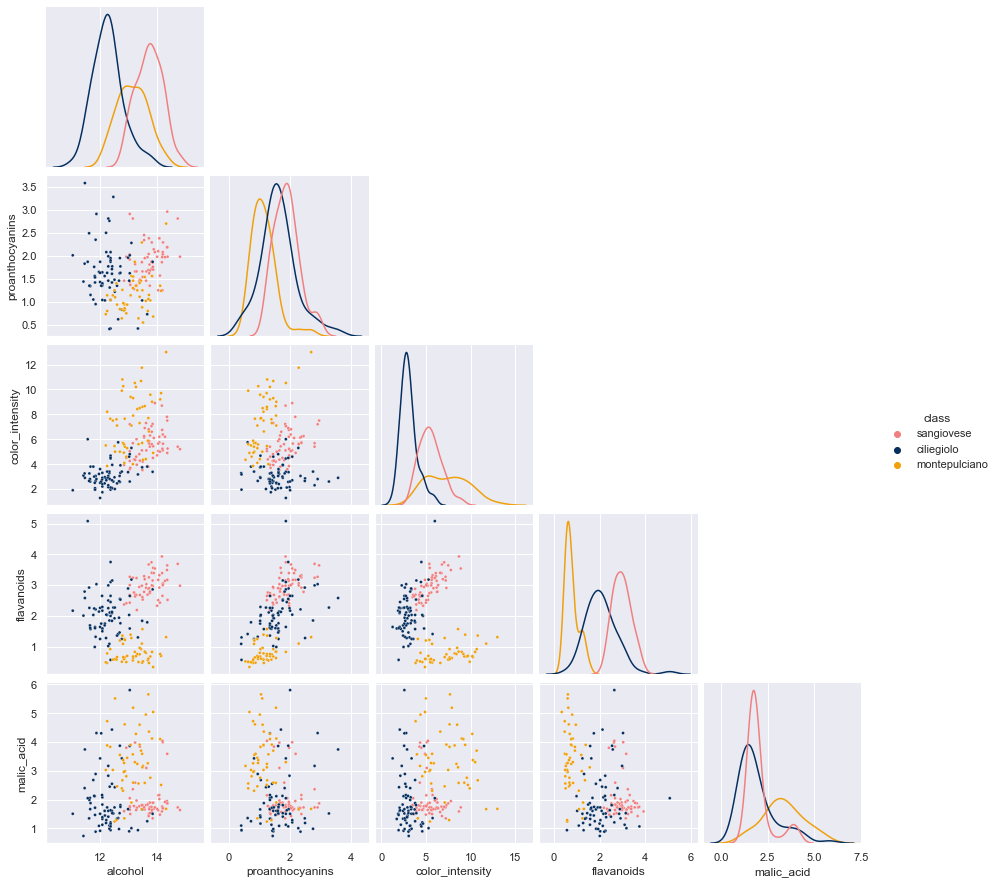

In [37]:
sns.set()
cols = ['alcohol', 'proanthocyanins', 'color_intensity', 'class', 'flavanoids', 'malic_acid']

sns.pairplot(X[cols], 
             hue='class', 
             palette={'sangiovese': '#F08080', 'ciliegiolo': '#052F5F', 'montepulciano': '#EFA00B'}, 
             corner=True,
             diag_kws={'fill': False},
             plot_kws={'s': 9})

plt.show()

In [22]:
X.info()
#no missing values (all non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [23]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [24]:
X['class'].value_counts() #count the diverse varieties

ciliegiolo       71
sangiovese       59
montepulciano    48
Name: class, dtype: int64

#### Relationship exploration: Continuous Vs Categorical -- ANOVA

Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable <br>

ANOVA hypothesis test is Null hypothesis(H0): there is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable).<br>
What I found: P-value<0.05, Null hypothesis is rejected. <br>

All the features are related with the categorical target 'class'. In this case I am going to use them all to make this exercise prediction.

In [25]:
# ANOVA for categorical target variable "class" and continuous predictors
continuous_var=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
                    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                    'color_intensity' ,'hue', 'od280/od315_of_diluted_wines', 'proline']

def FunctionAnova(inp_data, target_variable, continuous_predictor_list):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    selected_predictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in continuous_predictor_list:
        category_list=inp_data.groupby(target_variable)[predictor].apply(list)
        anova_results = f_oneway(*category_list)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (anova_results[1] < 0.05):
            print(predictor, 'is correlated with', target_variable, '| P-Value:', anova_results[1])
            selected_predictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', target_variable, '| P-Value:', anova_results[1])
    
    return(selected_predictors)
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inp_data=X, target_variable='class', continuous_predictor_list=continuous_var)

##### ANOVA Results ##### 

alcohol is correlated with class | P-Value: 3.319503795619532e-36
malic_acid is correlated with class | P-Value: 4.127228798041834e-14
ash is correlated with class | P-Value: 4.1499679747932855e-06
alcalinity_of_ash is correlated with class | P-Value: 9.444472938826817e-14
magnesium is correlated with class | P-Value: 8.963395439251042e-06
total_phenols is correlated with class | P-Value: 2.1376700154385093e-28
flavanoids is correlated with class | P-Value: 3.5985858307138326e-50
nonflavanoid_phenols is correlated with class | P-Value: 3.88804090047893e-11
proanthocyanins is correlated with class | P-Value: 5.125358737546706e-12
color_intensity is correlated with class | P-Value: 1.162008021927618e-33
hue is correlated with class | P-Value: 5.9176622163620664e-30
od280/od315_of_diluted_wines is correlated with class | P-Value: 1.393104956942896e-44
proline is correlated with class | P-Value: 5.783168356105498e-47


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

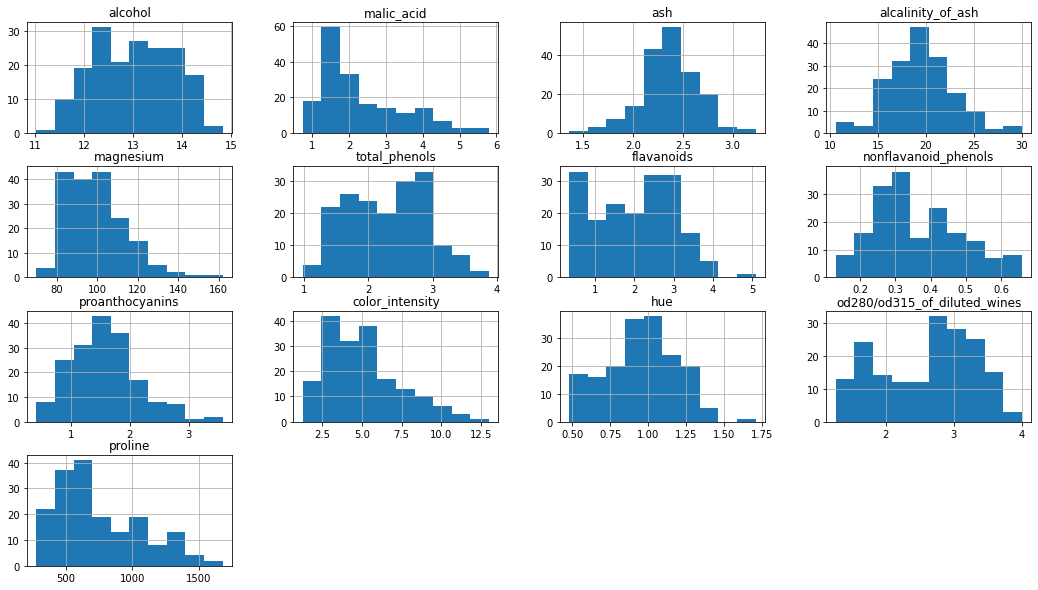

In [26]:
#analyse the distribution of the feature with highest correlation with classes
X.hist(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
                     'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                     'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'], figsize=(18,10))
plt.show()

Let's import the sklearn modules necessary to proceed

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [27]:
# separate target variable and predictor variables
predictors = X.drop('class', axis=1)
target =X['class']

X = predictors.values
y = target.values

In [28]:
X.shape , y.shape

((178, 13), (178,))

Down below I proceeded to scale the feature using the standardization method. <br>
Subsequently, I splitted the dataset in the train and test data.


In [29]:
#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#sanity check for the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124, 13)
(124,)
(54, 13)
(54,)


In [30]:
#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fitting and transform training data
X_test = scaler.transform(X_test) #transform test data

### Machine learning models elaboration
##### It is a classification problem

-First, define hyperparameters to use in the cross-validation, to find which perform best for those data and that model.         
-Secondly, fit the model with x and y training data.                                                                             
-Then, make the prediction and print the accuracy score.                                                                         
-Subsequently, plot the confusion matrix with the testing data to compare the actual target values with those predicted by the machine learning model. In this case, we'll have 3X3 matrix due to the three targets of our prediction.

Later, print a classification report to measure the quality of predictions from a classification algorithm:<br>
-accuracy is the percentage of instances where the model predicted the correct value;<br>
-recall is the ability of a classifier to find all positive instances;<br>
-the weighted average of F1 should be used to compare classifier models.


I decided to compare three different model, plus the one suggested by literature: support vector machine, logistic regression, k-nearest neighbors and linear discriminant analysis

#### SVM

{'C': 1, 'gamma': 10, 'kernel': 'linear'} 

Model accuracy on test set: 0.981


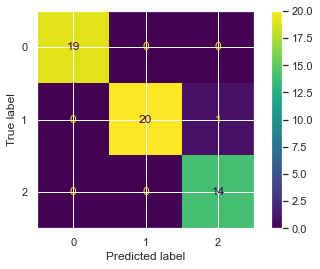

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [32]:
#define dictionary with model's hyperparameters
params_SVM = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], #since gamma is used in rbf, in this case will be useless
              'kernel': ['rbf', 'linear']
             }

#create SVM object and the cross validated classifier
svc = SVC()  
clf = GridSearchCV(svc, params_SVM, cv=5)

#fit the model
clf.fit(X_train, y_train)

#print the best hyperparameters
h = clf.best_params_
print(h, '\n') #the first printed is the best estimator

#make predictions with testing set
y_pred=clf.predict(X_test)

#print model accuracy
acc = accuracy_score(y_test, y_pred)
print('Model accuracy on test set: {:.3f}'.format(acc))

#plotting confusion matrix and classification report
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
print(classification_report(y_test,y_pred))


#### Logistic regression

{'C': 100, 'penalty': 'l2'} 

Model accuracy on test set: 0.981


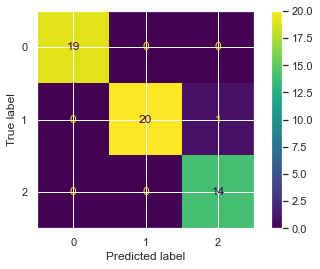

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [33]:
#define dictionary with model's hyperparameters
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], #C is the inverse of lambda parameter
    'penalty': ['l1', 'l2'] #choosing between lasso and ridge regression penalty
}

#create logistic regression object and the cross validated classifier
lr = LogisticRegression()
clf = GridSearchCV(lr, params, cv=5)

#fit the model
clf.fit(X_train, y_train)

#print the best hyperparameters
h = clf.best_params_
print(h, '\n') 

#make predictions with testing set
pred = clf.predict(X_test)

#print the model accuracy
acc = accuracy_score(y_test, pred)
print('Model accuracy on test set: {:.3f}'.format(acc))

#plotting confusion matrix and classification report
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, pred))

####  KNN   

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7} 

Model accuracy on test set: 0.981


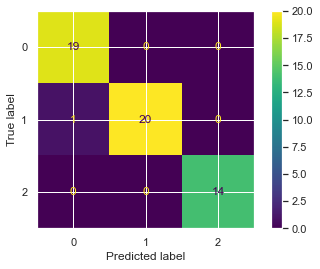

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [34]:
#define dictionary with model's hyperparameters
params_KNN = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'leaf_size': [20, 40, 200, 400],
    'metric': ['minkowski', 'taxicab']
}

#create K-nearest neighbors object and the cross validated classifier
KNN = KNeighborsClassifier()  
clf = GridSearchCV(KNN, params_KNN, cv=5)

#fit the data
clf.fit(X_train, y_train)

#print best parameters
h = clf.best_params_
print(h, '\n')

# make predictions with testing set
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
print('Model accuracy on test set: {:.3f}'.format(acc))

#plotting confusion matrix and classification report
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, pred))

#### LDA
Finally, I wanted to develop a regularized discriminant analysis model, which S. Aeberhard et al. (1992) shown to be the most effective in the prediction with this dataset (https://www.nbi.dk/~petersen/Teaching/ML2020/Week3/wine.names)



In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
params = {
    'solver': ['lsqr','eigen', 'svd'],  
    'n_components': [0, 1, 5],
    'store_covariance' : [True, False]
}

#create LDA object and the cross validated classifier
clf = GridSearchCV(lda, param_grid=params, cv=5)
clf.fit(X_train, y_train)

#print the best hyperparameters
h = clf.best_params_
print(h, '\n') #the first printed is the best estimator

#make predictions with testing set
y_pred=clf.predict(X_test)

#print model accuracy
acc = accuracy_score(y_test, y_pred)
print('Model accuracy on test set: {:.2f}'.format(acc))

{'n_components': 0, 'solver': 'lsqr', 'store_covariance': True} 

Model accuracy on test set: 1.00


Since the calculation of accuracy score from all models, I find out tha LDA performed the best on whole dataset (1.0), followed by logistic regression and SVM (0.981); ultimately, worst score owned to KNN method (0.944).